#Imports and reading the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np



df = pd.read_csv('Output.csv')
df

,item,depth,duration,mistakes,branch_factor,User
0,Korean Fried Chicken,1,25.272680,0,2,Nima
1,Thick crust pepperoni pizza,3,7.621724,1,2,Nima
2,Lobster roll,3,11.912208,1,2,Nima
3,Roman Thin crust pizza,6,7.524232,1,2,Nima
4,Pan-Seared Strip Steaks,6,45.583833,19,2,Nima
...,...,...,...,...,...,...
89,Chicken Tikka,4,6.271130,1,2,Daniel
90,Thin crust pepperoni pizza,1,17.926105,0,2,Daniel
91,Matcha green tea,2,11.673388,2,4,Daniel
92,Colombian coffee,2,3.065809,1,4,Daniel


# Time analysis

with 76 records.


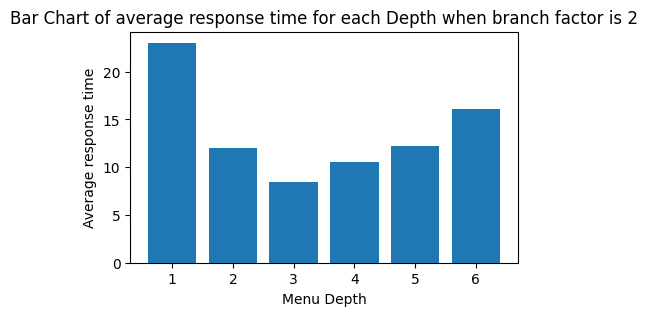

In [2]:
grouped_df = df[df[' branch_factor']==2].groupby('depth').agg(
    Count=('depth', 'count'),
    Duration_Sum=('duration', 'sum')
)

# Create a new column for the ratio
grouped_df['Average time'] = grouped_df['Duration_Sum'] / grouped_df['Count']
print('with', len(df[df[' branch_factor']==2]), 'records.')
# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average time'])
plt.xlabel('Menu Depth')
plt.ylabel('Average response time')
plt.title('Bar Chart of average response time for each Depth when branch factor is 2')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.show()

with 18 records.


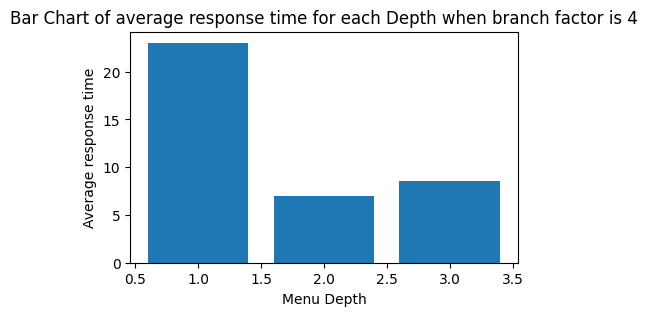

In [3]:
grouped_df = df[(df[' branch_factor'] == 4) | (df['depth'] == 1)].groupby('depth').agg(
    Count=('depth', 'count'),
    Duration_Sum=('duration', 'sum')
)

# Create a new column for the ratio
grouped_df['Average time'] = grouped_df['Duration_Sum'] / grouped_df['Count']
print('with', len(df[df[' branch_factor']==4]), 'records.')
# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average time'])
plt.xlabel('Menu Depth')
plt.ylabel('Average response time')
plt.title('Bar Chart of average response time for each Depth when branch factor is 4')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
plt.show()

#Mistake Analysis

with 76 records.


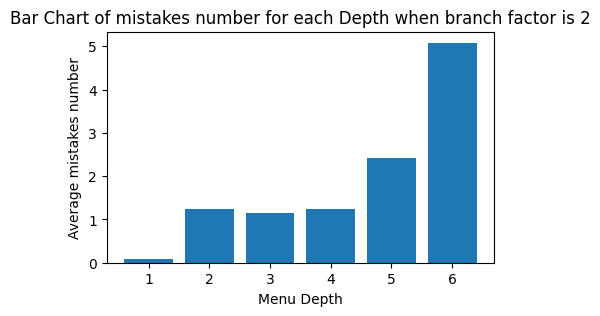

In [4]:
grouped_df = df[df[' branch_factor']==2].groupby('depth').agg(
    Count=('depth', 'count'),
    Mistakes_Sum=('mistakes', 'sum')
)
print('with', len(df[df[' branch_factor']==2]), 'records.')
# Create a new column for the ratio
grouped_df['Average mistakes number'] = grouped_df['Mistakes_Sum'] / grouped_df['Count']
# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average mistakes number'])
plt.xlabel('Menu Depth')
plt.ylabel('Average mistakes number')
plt.title('Bar Chart of mistakes number for each Depth when branch factor is 2')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.show()

with 18 records.


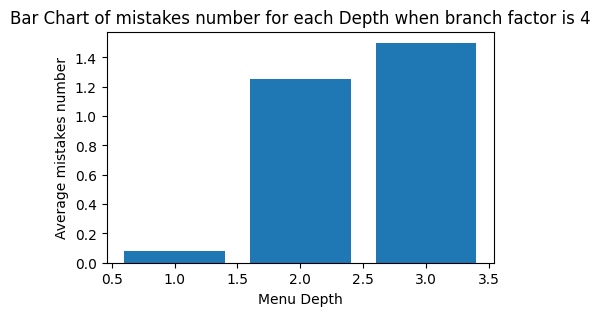

In [5]:
grouped_df = df[(df[' branch_factor'] == 4) | (df['depth'] == 1)].groupby('depth').agg(
    Count=('depth', 'count'),
    Mistakes_Sum=('mistakes', 'sum')
)

print('with', len(df[df[' branch_factor']==4]), 'records.')

# Create a new column for the ratio
grouped_df['Average mistakes number'] = grouped_df['Mistakes_Sum'] / grouped_df['Count']
grouped_df

# Plotting
plt.figure(figsize=(5,3))
plt.bar(grouped_df.index, grouped_df['Average mistakes number'])
plt.xlabel('Menu Depth')
plt.ylabel('Average mistakes number')
plt.title('Bar Chart of mistakes number for each Depth when branch factor is 4')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
plt.show()

# Experience Analysis

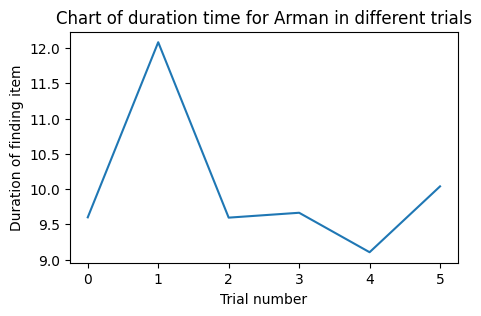

In [19]:
grouped_df = df[df[' User'] == ' Arman']

# print('with', len(df[df[' branch_factor']==2]), 'records.')

# Create a new DataFrame where each row is the mean of each group of 9 rows
grouped_df = grouped_df.reset_index(drop=True)
# df_downsampled = grouped_df['duration'].groupby(grouped_df['duration'] // 10).mean()
averages = []
for i in range(0, len(grouped_df['duration']), 6):
    avg = np.mean(grouped_df['duration'].iloc[i:i+6])
    averages.append(avg)

# Plotting
plt.figure(figsize=(5,3))
plt.plot(averages)
plt.xlabel('Trial number')
plt.ylabel('Duration of finding item')
plt.title('Chart of duration time for Arman in different trials')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.show()

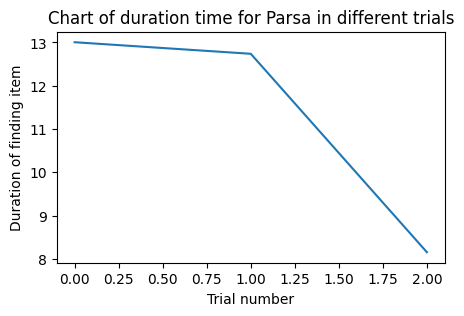

In [16]:
grouped_df = df[df[' User'] == ' Parsa']

# Create a new DataFrame where each row is the mean of each group of 9 rows
grouped_df = grouped_df.reset_index(drop=True)

averages = []
for i in range(0, len(grouped_df['duration']), 10):
    avg = np.mean(grouped_df['duration'].iloc[i:i+10])
    averages.append(avg)

# Plotting
plt.figure(figsize=(5,3))
plt.plot(averages)
plt.xlabel('Trial number')
plt.ylabel('Duration of finding item')
plt.title('Chart of duration time for Parsa in different trials')
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
plt.show()